In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
boston = load_boston()
X, y = boston.data, boston.target

Z:\Programme\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e

Z:\Programme\Anaconda\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
Z:\Programme\Anaconda\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


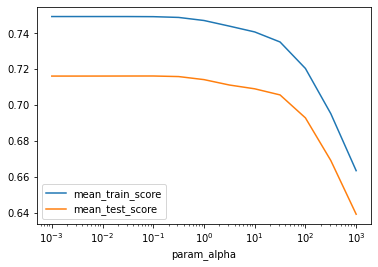

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': np.logspace(-3, 3, 13)}
grid = GridSearchCV(Ridge(), param_grid, cv = 10, return_train_score = True)
grid.fit(X_train, y_train)
results = pd.DataFrame(grid.cv_results_)
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax = plt.gca())
plt.xscale('log')

In [3]:
print('alpha:' + str(grid.best_params_['alpha']) + '\nbest_score:' + str(grid.best_score_))

alpha:0.1
best_score:0.7160600746856847


In [4]:
grid.score(X_test, y_test)

0.6838049959091365

Z:\Programme\Anaconda\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)
Z:\Programme\Anaconda\lib\site-packages\pandas\core\indexes\base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


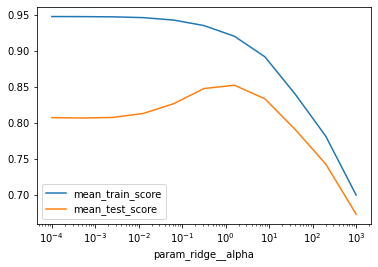

In [5]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(PolynomialFeatures(), StandardScaler(), Ridge())
param_grid = {'ridge__alpha': np.logspace(-4, 3, 11)}
grid = GridSearchCV(pipe, param_grid, cv = 10, return_train_score = True)
grid.fit(X_train, y_train)
results = pd.DataFrame(grid.cv_results_)
results.plot('param_ridge__alpha', 'mean_train_score')
results.plot('param_ridge__alpha', 'mean_test_score', ax = plt.gca())
plt.xscale('log')

In [6]:
print('ridge__alpha:' + str(grid.best_params_['ridge__alpha']) + '\nbest_score:' + str(grid.best_score_))

ridge__alpha:1.584893192461111
best_score:0.8522121277475552


In [7]:
grid.score(X_test, y_test)

0.830633539201505

<AxesSubplot:xlabel='param_polynomialfeatures__degree', ylabel='param_ridge__alpha'>

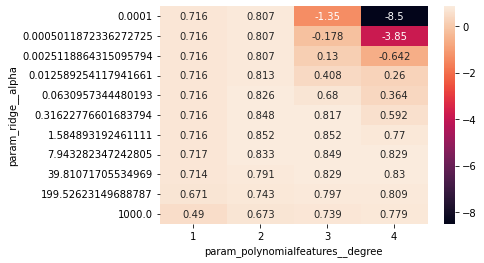

In [8]:
param_grid = {'polynomialfeatures__degree': [1, 2, 3, 4], 'ridge__alpha': np.logspace(-4, 3, 11)}
grid = GridSearchCV(pipe, param_grid, cv = 10, return_train_score = True)
grid.fit(X_train, y_train)
results = pd.DataFrame(grid.cv_results_)
res = pd.pivot_table(results, values = 'mean_test_score', index = 'param_ridge__alpha', columns = 'param_polynomialfeatures__degree')
import seaborn as sns
sns.heatmap(res, annot =True, fmt = '.3g')